In [1]:
import os
import numpy as np
import cv2
import imutils
import random

from IPython.display import display, Image
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
parentDir = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/"
bird_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataBird/"
dog_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataDog/"
cat_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataCat/"
horse_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataHorse/"
deer_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataDeer/"
frog_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataFrog/"
truck_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataTruck/"
airplane_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/"
ship_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataShip/"
auto_datapath = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAuto/"

dirDict = [bird_datapath,dog_datapath,cat_datapath,horse_datapath,deer_datapath,
           frog_datapath,truck_datapath ,airplane_datapath,ship_datapath,auto_datapath]

imagePath = []
for dirs in dirDict:
    randFile = random.choice(os.listdir(dirs))
    imagePath.append(dirs+randFile)
print (imagePath)

['/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataBird/46482.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataDog/8580.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataCat/18961.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataHorse/22202.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataDeer/18628.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataFrog/6988.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataTruck/16592.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAirplane/44370.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataShip/5988.png', '/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/trainDataAuto/9943.png']


Here we go to the CIFAR Directory with tall the images and pick a random image of each label form each directory.
We then do all the edge detection steps to see if edges coud be counted as a good feature extraction source.

In [3]:
def vizualize(imageArray, rows, columns):
    fig1, axs = plt.subplots(rows,columns, figsize=(15, 6), facecolor='y', edgecolor='k')
    axs = axs.ravel()
    for no, image in enumerate(imageArray):
        axs[no].imshow(image)

In [4]:
def image_standarize1(image):
    return(image - 255.0/2)/255.0

def image_standarize2(image):
    return(image/255.0)

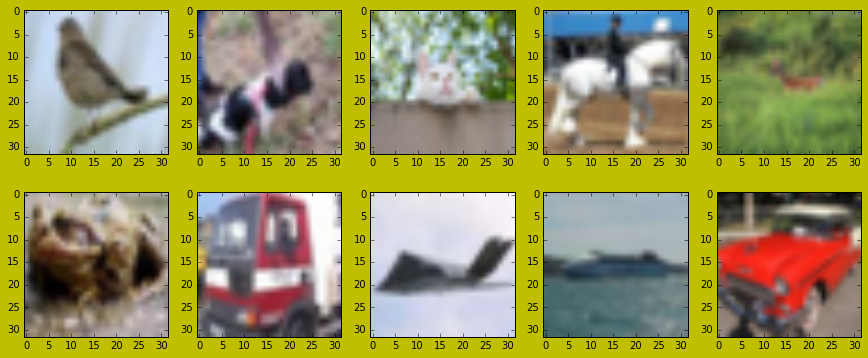

In [5]:
imageArr = [cv2.imread(img) for img in imagePath] 
imageArr = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imageArr]
vizualize(imageArr,rows=2,columns=5)

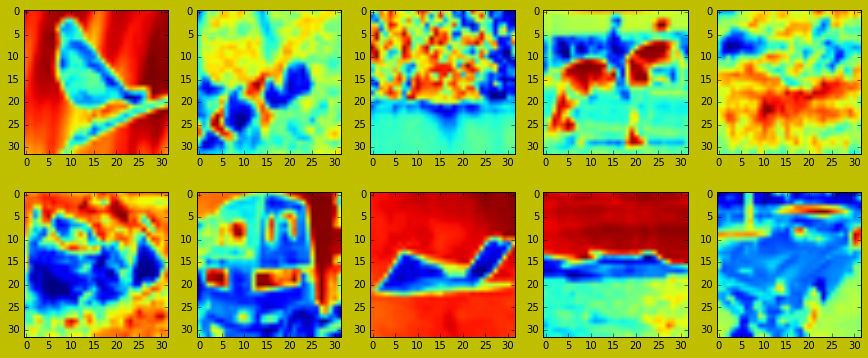

In [6]:
# Converting the image into Gray Scale Image:
imageGray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imageArr] 
vizualize(imageGray,rows=2,columns=5)

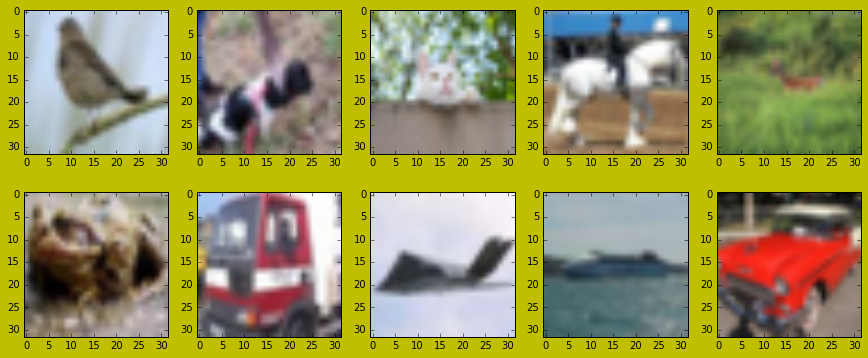

In [7]:
# Standarizing the image
imageScaled = [image_standarize2(img) for img in imageArr]
vizualize(imageScaled,rows=2,columns=5)

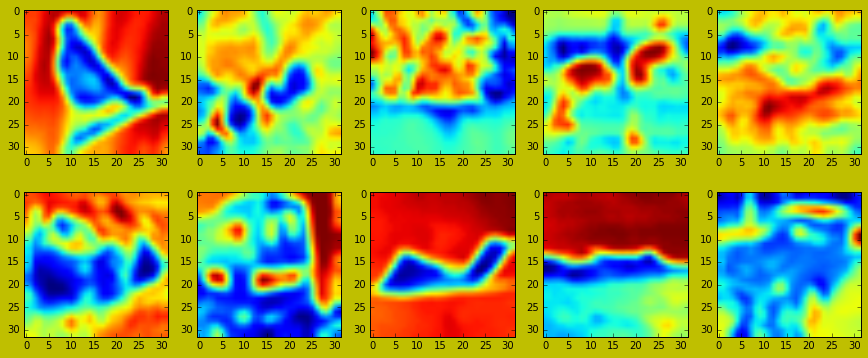

In [8]:
# Applyting Gaussian blurr blurr to the pictures
imageBlurr = [cv2.GaussianBlur(img, (3,3),3) for img in imageGray]
# A bigger value of sigma will result in better smooting. Since the image we are operating on is pretty small we 
# would want to use a small kernel (filter) and a small value of sigma
vizualize(imageBlurr,rows=2,columns=5)
# print (imageBlurr)

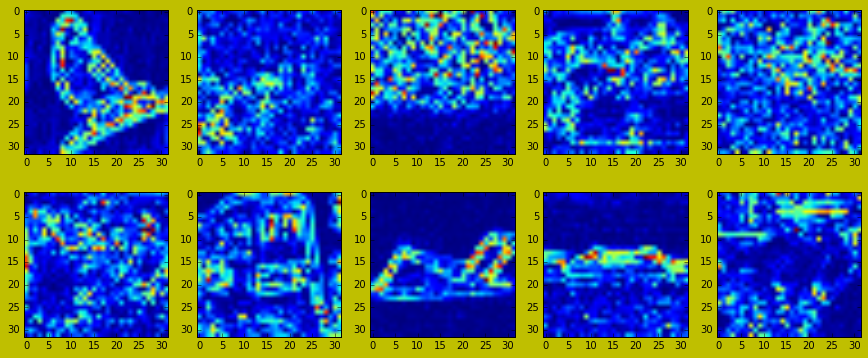

In [9]:
# Applying Edge detection Techniques, 1. Laplse Edge Detector.
imageLapEdge = [cv2.Laplacian(img, cv2.CV_64F) for img in imageGray]
imageLapEdge = np.uint8(np.absolute(imageLapEdge))
vizualize(imageLapEdge,rows=2,columns=5)

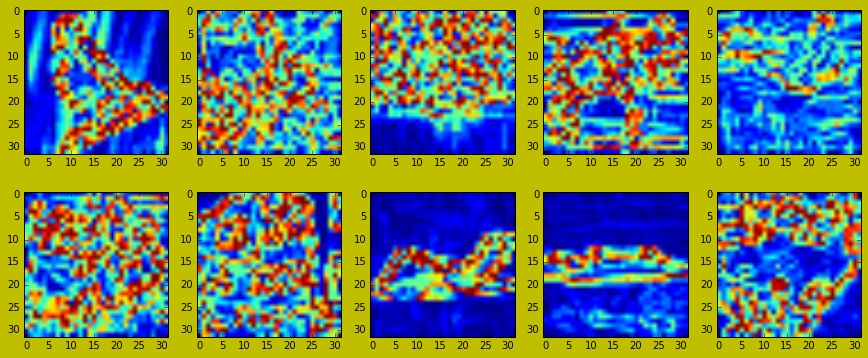

In [10]:
# Applying Edge detection Techniques, 1. Sobel Edge Detector.
# Now we shall use Sobel operator top determine the horizontal and vertical edges
def sobelEdge(img):
    sobelX= cv2.Sobel(img, cv2.CV_64F,1,0)
    sobelY= cv2.Sobel(img, cv2.CV_64F,0,1)
    sobelX = np.uint8(np.absolute(sobelX))#np.absolute(sobelX)
    sobelY = np.uint8(np.absolute(sobelY))#np.absolute(sobelY)
    sobelCombined = cv2.bitwise_or(sobelX, sobelY)
    return sobelCombined

imageSobEdge = [sobelEdge(img) for img in imageGray]
vizualize(imageSobEdge,rows=2,columns=5)

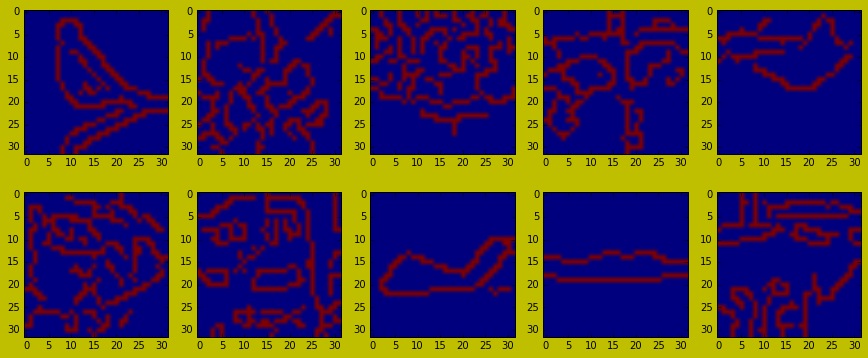

In [11]:
imageCannyEdge = [cv2.Canny(img, 60, 150) for img in imageBlurr]
vizualize(imageCannyEdge,rows=2,columns=5)